<a href="https://colab.research.google.com/github/Pasz93/MachineLearning/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

#Banco de Dados Geral
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')
dados



,idade,fatura,temp_cli,linhas,renda,temp_rsd,internet,premiere,cancel
0,51,543,26,4,5320.0,7.3,1,0,0
1,36,482,16,2,5620.0,4.5,1,0,0
2,35,593,15,1,4860.0,4.8,0,0,0
3,40,1184,22,1,6590.0,6.2,1,0,0
4,52,634,30,1,6370.0,2.2,0,0,0
...,...,...,...,...,...,...,...,...,...
1994,31,625,15,4,10170.0,1.5,0,1,1
1995,37,4322,18,4,12230.0,4.6,1,1,1
1996,29,517,12,5,5590.0,6.7,1,0,1
1997,34,528,14,1,4760.0,6.9,1,0,1


In [5]:

#Declarar X e Y
y = dados['cancel']
X = dados.drop('cancel', axis =1)
features = X.columns
features


Index(['idade', 'fatura', 'temp_cli', 'linhas', 'renda', 'temp_rsd',
       'internet', 'premiere'],
      dtype='object')

Acurácia média na validação cruzada: 0.7878898898898898


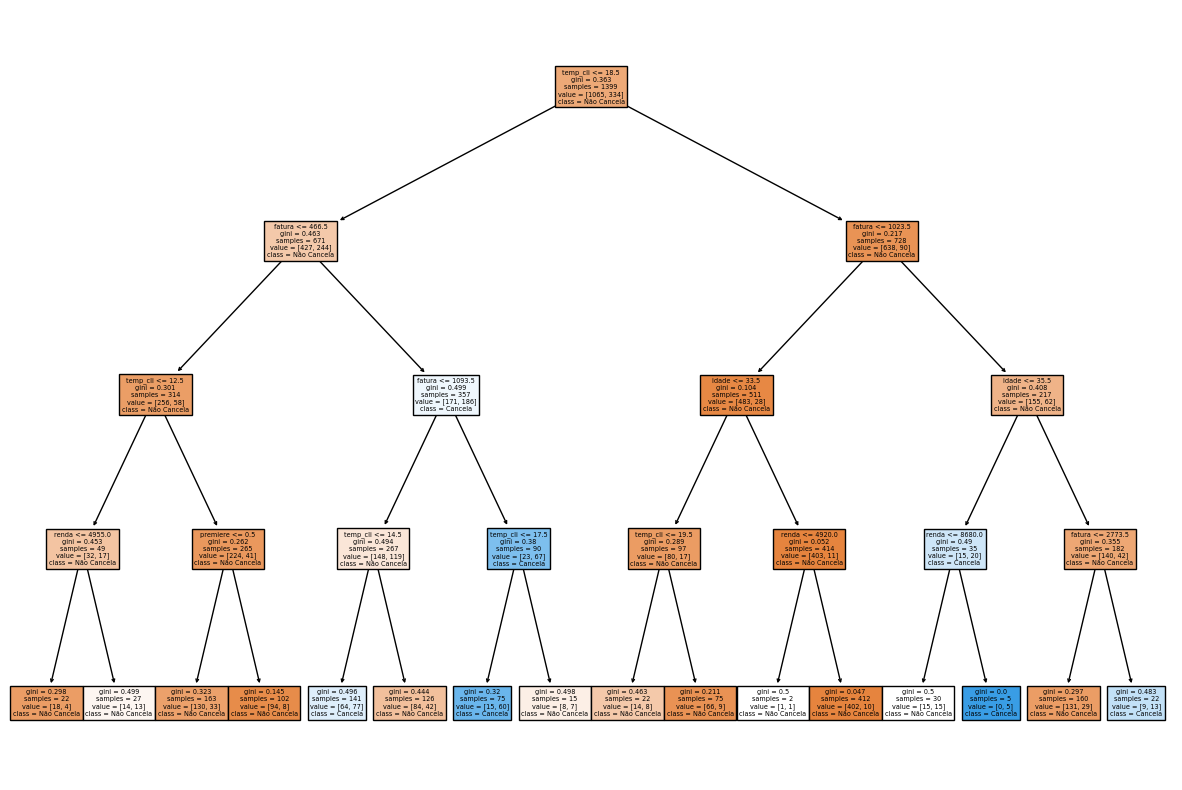

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

# Separando em variáveis dependentes e independentes
y = dados['cancel']
x = dados.drop('cancel', axis=1)

# Dividindo os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo
modelo = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo.fit(x_train, y_train)

# Avaliando o modelo com cross-validation (split = 2 para máxima profundidade 4)
scores = cross_val_score(modelo, x, y, cv=2, scoring='accuracy')
print("Acurácia média na validação cruzada:", scores.mean())

# Plotando a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(modelo, filled=True, feature_names=x.columns, class_names=['Não Cancela', 'Cancela'])
plt.show()



Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Melhor Score (Acurácia): 0.7886265673981191
Acurácia no Conjunto de Teste: 0.7775


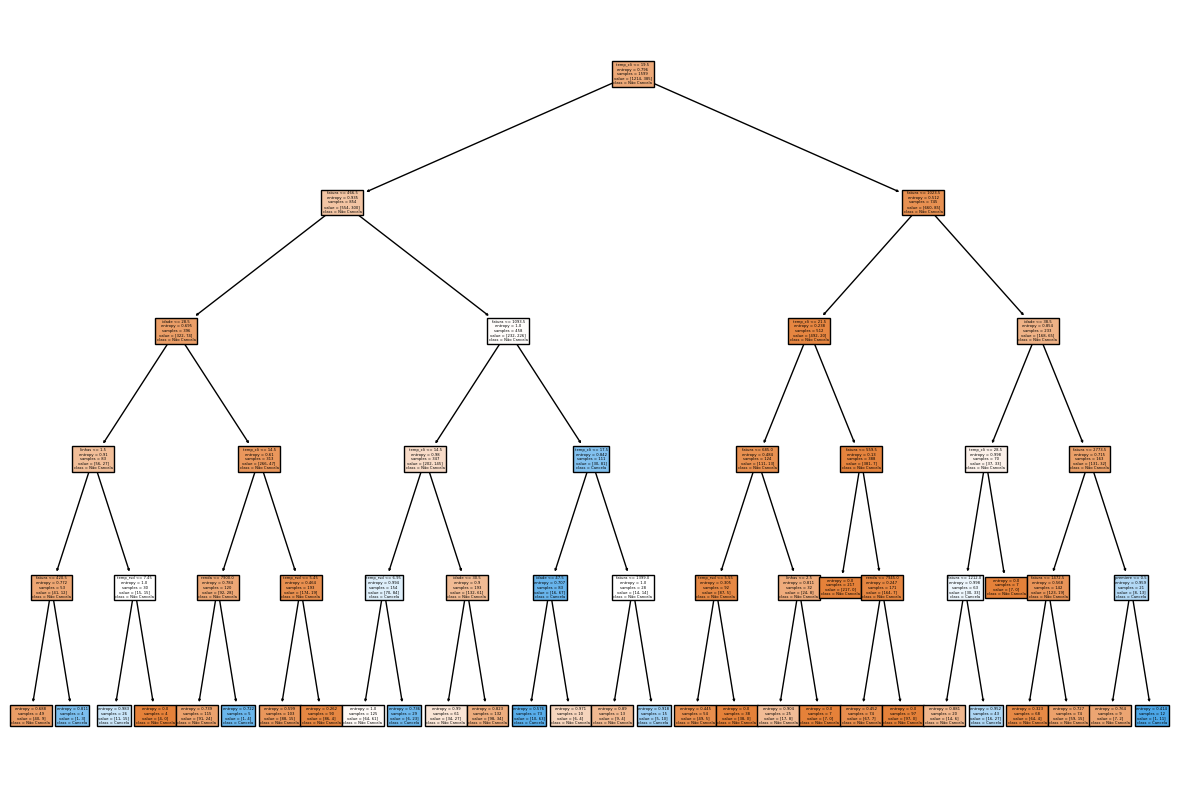

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

# Separando em variáveis dependentes e independentes
y = dados['cancel']
x = dados.drop('cancel', axis=1)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criando o modelo
modelo = DecisionTreeClassifier(random_state=42)

# Definindo a grade de parâmetros para o GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 4, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando e treinando o GridSearchCV
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhores parâmetros e melhor score
melhores_parametros = grid_search.best_params_
melhor_score = grid_search.best_score_

print("Melhores Parâmetros:", melhores_parametros)
print("Melhor Score (Acurácia):", melhor_score)

# Avaliando o modelo no conjunto de teste
acuracia_teste = grid_search.best_estimator_.score(X_test, y_test)
print("Acurácia no Conjunto de Teste:", acuracia_teste)

# Plotando a árvore de decisão do melhor modelo
melhor_modelo = grid_search.best_estimator_
plt.figure(figsize=(15, 10))
plot_tree(melhor_modelo, filled=True, feature_names=X_train.columns, class_names=['Não Cancela', 'Cancela'])
plt.show()
